In [13]:
import mxnet as mx
import matplotlib.pyplot as plt
import cv2
import numpy as np
# define a simple data batch
from collections import namedtuple
import os
import signal
import random

import pyttsx3;

import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output


Batch = namedtuple('Batch', ['data'])

def get_image(url, show=False):
    # download and show the image
    fname = mx.test_utils.download(url)
    img = cv2.cvtColor(cv2.imread(fname), cv2.COLOR_BGR2RGB)
    if img is None:
         return None
    if show:
         plt.imshow(img)
         plt.axis('off')
         plt.show()
    # convert into format (batch, RGB, width, height)
    img = cv2.resize(img, (224, 224))
    img = np.swapaxes(img, 0, 2)
    img = np.swapaxes(img, 1, 2)
    img = img[np.newaxis, :]
    return img

In [24]:
def predict(url):
    img = get_image(url, show=True)
    # compute the predict probabilities
    mod.forward(Batch([mx.nd.array(img)]))
    #print(mod.get_outputs())
    prob = mod.get_outputs()[0].asnumpy()
    
    internals = mod.symbol.get_internals()
    #print(internals)
    # print the top-5
    prob = np.squeeze(prob)
    a = np.argsort(prob)[::-1]
    for i in a[0:5]:
        print('probability=%f, class=%s' %(prob[i], labels[i]))

In [2]:
#Load Trained Model
sym, arg_params, aux_params = mx.model.load_checkpoint('resnet-101', 0)
mod = mx.mod.Module(symbol=sym, context=mx.cpu(), label_names=None)
mod.bind(for_training=False, data_shapes=[('data', (1,3,224,224))], 
         label_shapes=mod._label_shapes)
mod.set_params(arg_params, aux_params, allow_missing=True)
with open('synset_101.txt', 'r') as f:
    labels = [l.rstrip() for l in f]

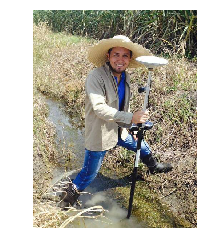

probability=0.937267, class=n03124170 cowboy hat, ten-gallon hat
probability=0.037101, class=n04259630 sombrero
probability=0.003696, class=n03498962 hatchet
probability=0.002988, class=n04067472 reel
probability=0.002889, class=n03124043 cowboy boot


In [26]:
predict(os.getcwd()+'\\testimages\\test_1.jpg')

In [3]:
engine = pyttsx3.init()
engine.say("Text to speech demo example")
engine.runAndWait() 

In [4]:
## Speach
def predict_speach(url):
    img = get_image(url, show=True)
    # compute the predict probabilities
    mod.forward(Batch([mx.nd.array(img)]))
    #print(mod.get_outputs())
    prob = mod.get_outputs()[0].asnumpy()
    
    internals = mod.symbol.get_internals()
    #print(internals)
    # print the top-5
    prob = np.squeeze(prob)
    a = np.argsort(prob)[::-1]
    
    engine.say(labels[a[0]].split(" ")[1])
    print(labels[a[0]].split(" ")[1])
    engine.runAndWait() 
    for i in a[0:5]:
        print('probability=%f, class=%s' %(prob[i], labels[i]))

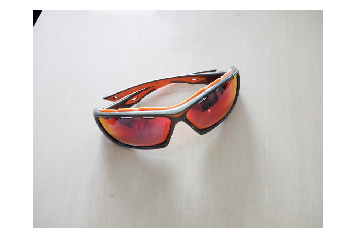

sunglasses,
probability=0.794391, class=n04356056 sunglasses, dark glasses, shades
probability=0.205567, class=n04355933 sunglass
probability=0.000012, class=n03476684 hair slide
probability=0.000005, class=n02910353 buckle
probability=0.000005, class=n04026417 purse


In [5]:
predict_speach(os.getcwd()+'\\testimages\\test_49.jpg')

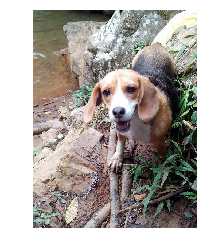

beagle
probability=0.992697, class=n02088364 beagle
probability=0.002413, class=n02089973 English foxhound
probability=0.002098, class=n02089867 Walker hound, Walker foxhound
probability=0.001040, class=n02088632 bluetick
probability=0.000746, class=n02088238 basset, basset hound


In [6]:
predict_speach(os.getcwd()+'\\testimages\\test_60.jpg')

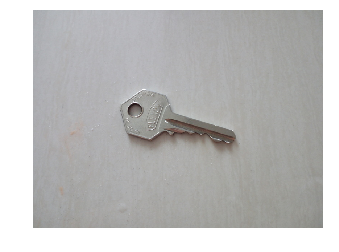

hair
probability=0.220985, class=n03476684 hair slide
probability=0.172192, class=n03532672 hook, claw
probability=0.118613, class=n03874599 padlock
probability=0.057576, class=n04086273 revolver, six-gun, six-shooter
probability=0.036771, class=n04579432 whistle


In [15]:
#if doesnt work, before stasrt jupyter notebook check if the extension is enabled - jupyter nbextension enable --py widgetsnbextension --sys-prefix
#print(widgets.Button.on_click.__doc__)
button = widgets.Button(description="Imagen Aleatorea")
display(button)


In [16]:
def onClickedButton(b):
    rnd=(random.randint(1, 60))
    clear_output()
    predict_speach(os.getcwd()+'\\testimages\\test_'+str(rnd)+'.jpg')

button.on_click(onClickedButton)